## Stellar Classification

An exploration of a set 100,000 observations of stars, galaxies, and quasars done by the Sloan Digital Sky Survey

https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17?resource=download

In [117]:
#Requirements

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [118]:
#Creating a dictionary to print each descriptor 

data_key = {
    "obj_ID" : "0bj_ID = object indentifier, the unique value that identifies the object in the image catalog used by the CAS",
    "alpha" : "alpha = Right Ascension angle (at J2000 epoch)",
    "delta" : "delta = Declination angle (at J2000 epoch)",
    "u" : "u = Ultraviolet filter in the photometric system",
    "g" : "g = Green filter in the photometric system",
    "r" : "r = Red filter in the photometric system",
    "i" : "i = Near Infrared filter in the photometric system",
    "z" : "z = Infrared filter in the photometric system",
    "run_ID" : "run_ID = Run Number used to identify the specific scan",
    "rereun_ID" : "rerun_Id = Rerun Number to specify how the image was processed",
    "cam_col" : "cam_col = Camera column to identify the scanline within the run",
    "field_ID" : "field_ID = Field number to identify each field",
    "spec_obj_ID" : "spec_obj_ID = Unique ID used for optical spectroscopic objects",
    "class" : "class = object class, (galaxy, star, or quasar)",
    "redshift" : "redshift = redshift value based on the increase in wavelength",
}


In [119]:
#Pulling in the data

df = pd.read_csv('star_classification_data_original.csv')
df.head()


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [120]:
#Using the length function to check that the data set is complete

len(df)

100000

In [121]:
#Using the list function to check that I have all three types of stellar objects represented

stellar_object = list(df['class'].unique())
stellar_object

['GALAXY', 'QSO', 'STAR']

## Visualizing the full data set


In [122]:
data_key['alpha']

'alpha = Right Ascension angle (at J2000 epoch)'

In [123]:
data_key['redshift']

'redshift = redshift value based on the increase in wavelength'

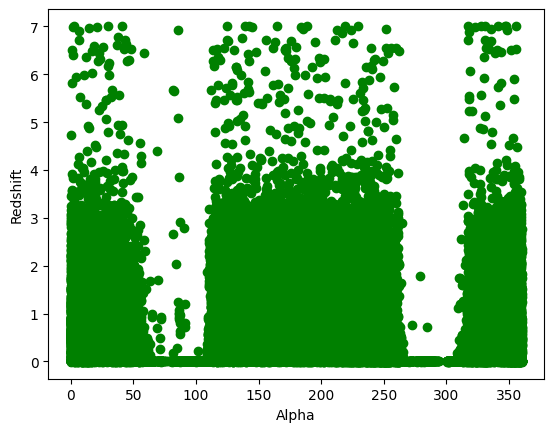

In [124]:
#Plotting right ascension and redshift

plt.scatter(x=df['alpha'],y=df['redshift'], c='g')
plt.xlabel('Alpha')
plt.ylabel('Redshift')
plt.show()



In [125]:
data_key['class']

'class = object class, (galaxy, star, or quasar)'

In [126]:
data_key['redshift']

'redshift = redshift value based on the increase in wavelength'

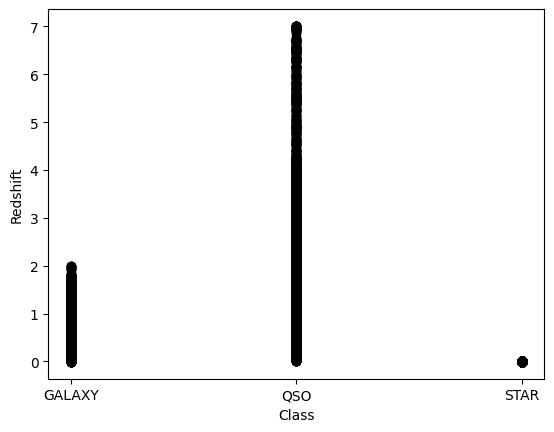

In [127]:
#Plotting class and redshift

x=df['class']
y=df['redshift']
plt.scatter(x,y, c='k')
plt.xlabel('Class')
plt.ylabel('Redshift')
plt.show()


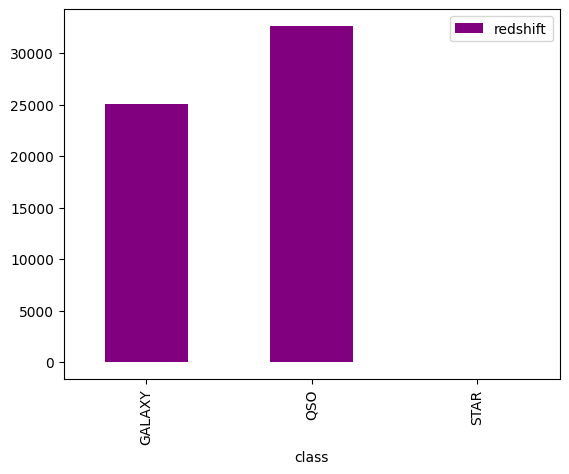

In [128]:
#cleaning up the visualization

df.groupby(['class'], as_index = False).sum().plot(kind = 'bar', x = 'class', y = 'redshift', color = 'purple')
plt.show()


In [129]:
data_key['u']

'u = Ultraviolet filter in the photometric system'

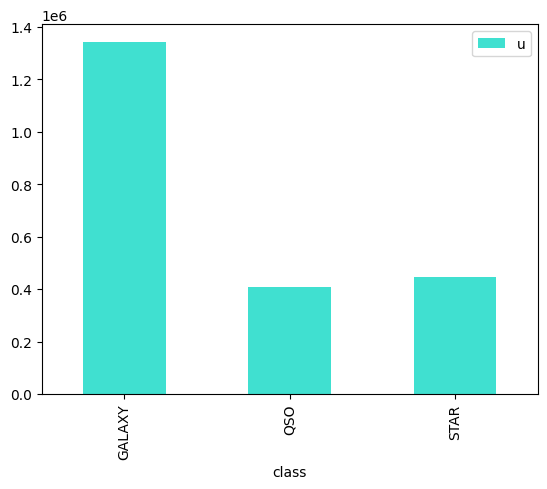

In [130]:
#Plotting class and ultraviolet radiation

df.groupby(['class'], as_index = False).sum().plot(kind = 'bar', x = 'class', y = 'u', color = 'turquoise')
plt.show()


## Cleaning the data

In [131]:
df = pd.read_csv('star_classification_data_clean.csv')
df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [132]:
#Checking that the data set is complete

len(df)

100000

In [133]:
#Removing unwanted columns

df.drop(['run_ID', 'rerun_ID', 'obj_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID', 'cam_col'], axis=1, inplace=True)

In [134]:
df.head(20)

,alpha,delta,u,g,r,i,z,field_ID,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,79,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,119,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,120,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,214,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,137,GALAXY,0.116123
5,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,110,QSO,1.424659
6,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,462,QSO,0.586455
7,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,346,GALAXY,0.477009
8,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,108,GALAXY,0.660012
9,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,122,STAR,-0.000008


In [135]:
#defining and calling a function

def f(Class, redshift, alpha):
    print(f'{Class} with a redshift {redshift} has a right ascension angle of {alpha:.2f}')

f('Observed galaxy', 0.634794, 135.689107)



Observed galaxy with a redshift 0.634794 has a right ascension angle of 135.69


In [136]:
#dropping galaxies and stars from the set

df.drop(df.loc[df['class']==str('GALAXY')].index, inplace=True)    
df.drop(df.loc[df['class']==str('STAR')].index, inplace=True)


df.head(20)

,alpha,delta,u,g,r,i,z,field_ID,class,redshift
5,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,110,QSO,1.424659
6,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,462,QSO,0.586455
17,1.494389,3.291746,20.38562,20.40514,20.29996,20.05918,19.89044,339,QSO,2.031528
23,145.883006,47.300484,21.73992,21.53095,21.26763,21.36257,21.15861,33,QSO,2.075680
33,20.052556,11.497881,21.89214,21.35124,21.18755,20.84300,20.76580,441,QSO,1.528308
47,228.447728,12.745032,22.36261,21.71060,21.59630,21.60179,21.12727,125,QSO,2.689002
48,345.221147,2.593462,21.90143,21.79169,21.44344,21.25545,21.07686,231,QSO,1.289637
51,168.726601,27.680925,21.65936,21.73216,21.61713,21.60229,21.24192,385,QSO,1.007728
71,178.504616,54.379157,21.77434,21.65529,21.77547,21.72382,21.66425,177,QSO,1.939080
72,144.742439,46.967191,20.87676,20.61914,20.55744,20.54716,20.15146,28,QSO,1.040196


## Analyzing and Visualizing the clean data

In [137]:
data_key['delta']

'delta = Declination angle (at J2000 epoch)'

In [138]:
data_key['redshift']

'redshift = redshift value based on the increase in wavelength'

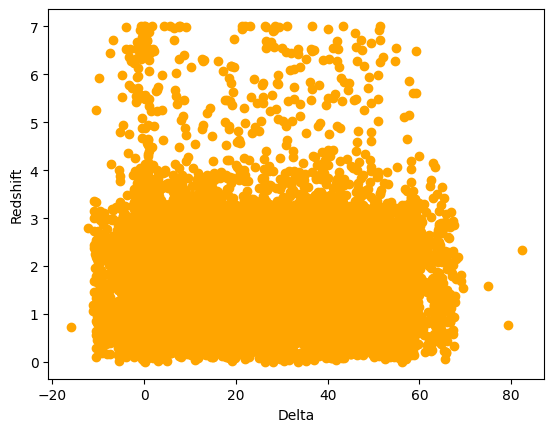

In [139]:
#Plotting delta and redshift for only quasar observations

x=df['delta']
y=df['redshift']
plt.scatter(x,y, c='orange')
plt.xlabel('Delta')
plt.ylabel('Redshift')
plt.show()


In [150]:
#Finding the means of the remaining columns

means = df.mean(numeric_only=True)
print(means)

alpha       180.474314
delta        26.808621
u            21.547619
g            20.926193
r            20.624089
i            20.431173
z            20.266732
field_ID    177.886979
redshift      1.719676
dtype: float64
